In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_side = cv2.imread("bee_side1.jpg")

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.imshow("Image", img_side)

# Initialize an empty list to store the seed points
seed_points = []

# Define a callback function to handle mouse events
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        seed_points.append([x, y])
        cv2.circle(img_side, (x, y), 3, (0, 255, 0), -1)
        cv2.imshow("Image", img_side)

# Set the callback function for the window
cv2.setMouseCallback("Image", on_mouse)

# Wait for the user to select the seed points
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q") or len(seed_points) >= 20:
        break

# Convert the list of seed points to a numpy array
seed_points = np.array(seed_points)

# Destroy the window
cv2.destroyAllWindows()

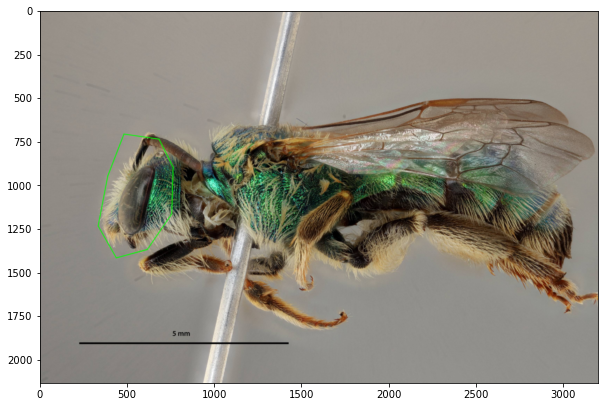

In [161]:
img_contour = cv2.polylines(img_side, [seed_points], isClosed=True, color=(0, 255, 0), thickness=3)
# Apply a Gaussian filter to the image
img_contour = cv2.GaussianBlur(img_contour, (7, 7), 0)
img_contour = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(img_contour)
plt.show()

## Preprossessing the image before active contour
Image denoising: To remove the noise in the image, denoising techniques such as median filtering or Gaussian smoothing can be applied.

Image binarization: To separate the object of interest from the background, image binarization techniques such as thresholding or adaptive thresholding can be applied.

Image gradients: To compute the image gradients, which are often used as the external energy in active contour algorithms, gradient computation techniques such as Sobel or Canny can be applied.

Image smoothing: To reduce the fluctuations in the contour, smoothing techniques such as Gaussian smoothing can be applied.

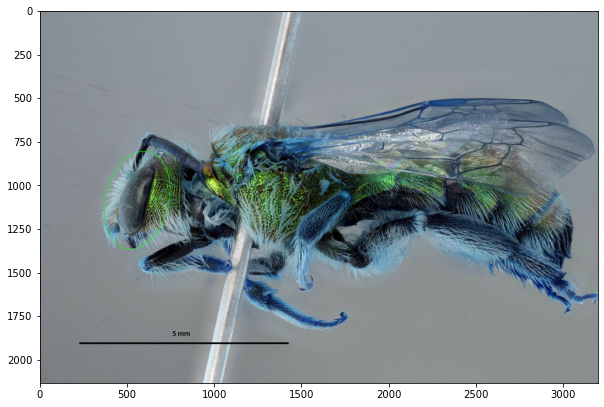

In [3]:
import cv2
import numpy as np

# Fit an ellipse to the points
ellipse = cv2.fitEllipse(seed_points)

# Create a black image
img = cv2.imread("bee_side1.jpg")


rows, cols = img_side.shape[:2]
mask = np.zeros((rows, cols), np.uint8)

# Draw the ellipse on the image
cv2.ellipse(img, ellipse, (0, 255, 0), 2)

plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.show()



In [4]:
# Get 400 points on the ellipse
ellipse_points = []
for i in range(400):
    theta = 2 * np.pi * i / 400
    x = ellipse[0][0] + ellipse[1][0]*0.5 * np.cos(theta)
    y = ellipse[0][1] + ellipse[1][1]*0.5 * np.sin(theta)
    ellipse_points.append([x, y])

# Convert the points to a numpy array
ellipse_points = np.array(ellipse_points, dtype=np.int32)

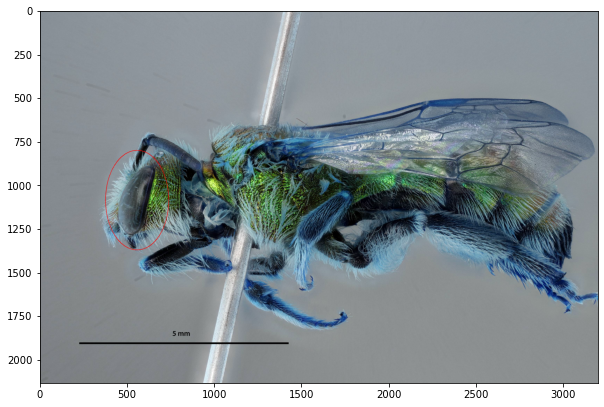

In [5]:
test = cv2.imread("bee_side1.jpg")
cv2.polylines(test, [ellipse_points.astype(np.int32)], isClosed=True, color=(255, 0, 0), thickness=2)

fig, ax1 = plt.subplots(figsize=(10,10))
plt.imshow(test)
plt.show()

In [14]:
s = np.linspace(0, 2*np.pi, 600)
r = 550 + 250*np.sin(s)
c = 1100 + 250*np.cos(s)
circle_points = np.array([r, c]).T

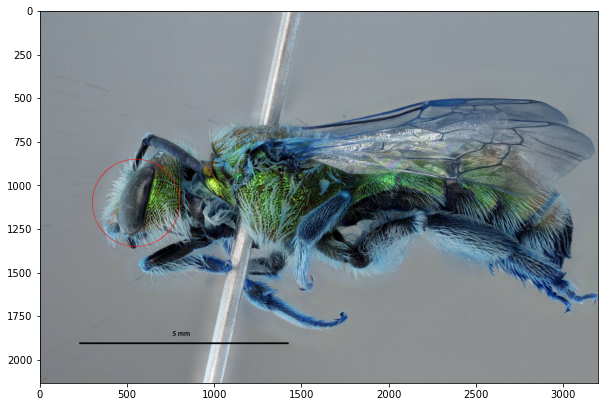

In [15]:
test = cv2.imread("bee_side1.jpg")
cv2.polylines(test, [circle_points.astype(np.int32)], isClosed=True, color=(255, 0, 0), thickness=2)

fig, ax1 = plt.subplots(figsize=(10,10))
plt.imshow(test)
plt.show()

In [6]:

from skimage import color, data, segmentation, filters, future
from skimage.draw import polygon
from skimage.filters import gaussian

In [16]:
sna = segmentation.active_contour(gaussian(img_side, 3, preserve_range=False), circle_points, alpha=0.015, beta=10, gamma=0.001)

In [9]:
sna

array([[ 725.26404496, 1131.95126995],
       [ 725.39361515, 1134.04514514],
       [ 725.52809428, 1136.17058376],
       [ 725.66618953, 1138.3250847 ],
       [ 725.80796132, 1140.50685128],
       [ 725.95403027, 1142.71625019],
       [ 726.10387383, 1144.95402766],
       [ 726.25464033, 1147.2190455 ],
       [ 726.4011307 , 1149.50794618],
       [ 726.53837187, 1151.81740649],
       [ 726.66395665, 1154.14631953],
       [ 726.77750403, 1156.49546747],
       [ 726.87842147, 1158.86447382],
       [ 726.96446058, 1161.2501396 ],
       [ 727.03471096, 1163.65027657],
       [ 727.08862704, 1166.06228803],
       [ 727.12565741, 1168.4815584 ],
       [ 727.14342868, 1170.90652711],
       [ 727.13812982, 1173.33702836],
       [ 727.10582234, 1175.77123941],
       [ 727.04366201, 1178.2091283 ],
       [ 726.94914555, 1180.65066011],
       [ 726.81893266, 1183.09421741],
       [ 726.64953661, 1185.53796686],
       [ 726.4377174 , 1187.98028859],
       [ 726.18065917, 11

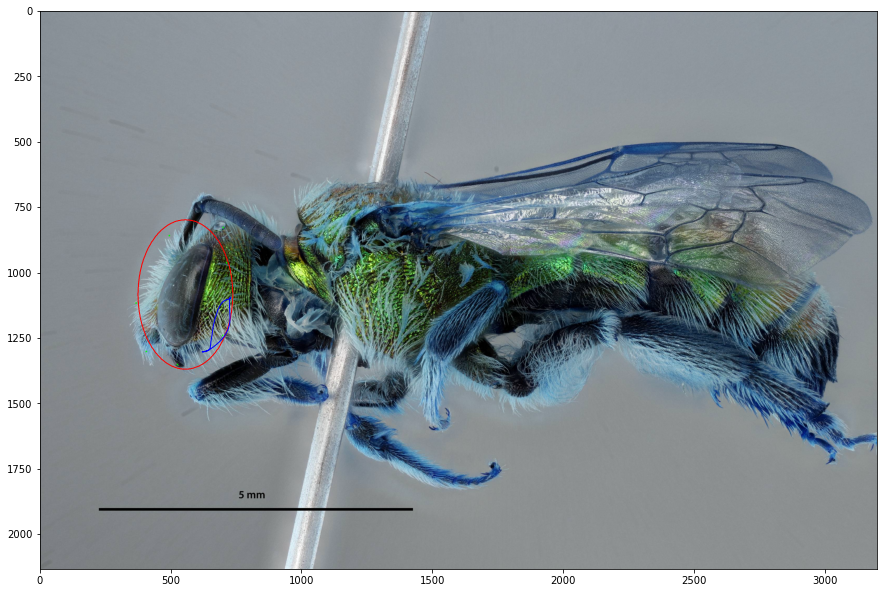

In [12]:
fig, ax1 = plt.subplots(figsize=(15,15))
ax1.imshow(img_side, cmap='gray')

plt.plot(ellipse_points[:, 0], ellipse_points[:, 1], '-r', lw = 1)
plt.plot(sna[:, 0], sna[:, 1], '-b', lw=1)
plt.show()

#%%[markdown]
# ![title](images/output1.png)

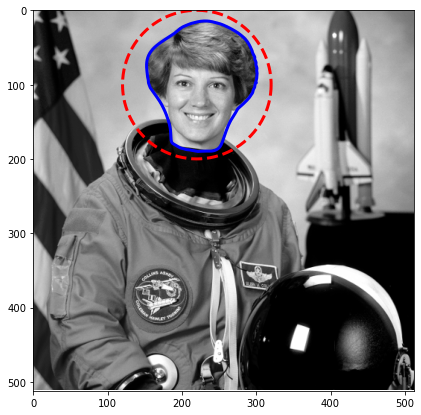

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [30]:
ellipse

((563.2504272460938, 1095.998291015625),
 (283.3727111816406, 541.9879150390625),
 14.157783508300781)